In [4]:
import numpy as np
import pandas as pd

from collections import Counter

In [2]:
train = pd.read_csv('/kaggle/input/russian-social-media-text-classification/train.csv')
test = pd.read_csv('/kaggle/input/russian-social-media-text-classification/test.csv')
sample_submission = pd.read_csv('/kaggle/input/russian-social-media-text-classification/sample_submission.csv')
CLASSES = list(train['category'].unique())
CLASSES

['winter_sport',
 'extreme',
 'football',
 'boardgames',
 'hockey',
 'esport',
 'athletics',
 'motosport',
 'basketball',
 'tennis',
 'autosport',
 'martial_arts',
 'volleyball']

### Manual cleaning by [Mike Mazurov](https://www.kaggle.com/code/mikhailma/russian-text-classification-in-15-minute-pl-0-95)


In [5]:
### Manual cleaning of text from job offers and advertisements

train['text_length'] = train['text'].apply(len)
test['text_length'] = test['text'].apply(len)

train['occurrence'] = train['text'].map(dict(Counter(train['text'].to_list())))
test['occurrence'] = test['text'].map(dict(Counter(test['text'].to_list())))

train = train.drop(train[train['occurrence'] == 33].index)
train = train.drop(train[train['occurrence'] == 163].index)
train = train.drop(train[train['occurrence'] == 50].index)
train = train.drop(train[train['occurrence'] == 26].index)
train = train.drop(train[train['occurrence'] == 21].index)
train = train.drop(train[train['occurrence'] == 20].index)
train = train.drop(train[train['occurrence'] == 19].index)
train = train.drop(train[train['occurrence'] == 15].index)
train = train.drop(train[train['occurrence'] == 14].index)
train = train.drop(train[train['occurrence'] == 13].index)
train = train.drop(train[train['occurrence'] == 11].index)
train = train.drop(train[train['occurrence'] == 10].index)
train = train.drop(train[train['occurrence'] == 9].index)
train = train.drop(train[train['occurrence'] == 8].index)
train = train.drop(train[train['occurrence'] == 7].index)
train = train.drop(train[train['occurrence'] == 6].index)
train = train.drop(train[train['occurrence'] == 5].index)
train = train.drop(train[train['occurrence'] == 4].index)
train = train.drop(train[train['occurrence'] == 3].index)


train = train.drop(train[train['text'] == 'Топовые кроссовки для баскетбола tokenoidtokenoid любимых игроков NBA tokenoidtokenoid 6 лет выполнили 100. 000 заказов'].index)
train = train.drop(train[train['text'] == 'Премиальный подарок мужчине 33 Шахматы и нарды с именной гравировкой из массива дуба латуни и натуральной кожи. Посмотреть цены'].index)

train = train.drop(train[train['text'] == 'Вакансия HR менеджер. Обязанности 1. Ознакомление с требованиями заказчика. 2. Первичный выбор подходящих кандидатов из нашей базы резюме. 3. Отправка сообщений потенциальным кандидатам. 4. Сортировка принятых и отклоненных. 5. Передача финального списка заказчику. 6. Формирование отчета. Условия Работа из любой точки мира Работа через интернет не привязывает вас ни к какому месту жительства и позволяет работать в любом месте где есть доступ к сети интернет. Бесплатное обучение Наша компания проводит бесплатное комплексное обучение поэтому если вы никогда не работали в данной сфере не стоит бояться. Высокий доход Заработная плата состоит из двух частей оклад 80000р процент за каждого одобренного кандидата. Официальное трудоустройство по желанию Официальное трудоустройство по ТК РФ справка 2 НДФЛ и взносы в пенсионный фонд РФ. Требования Возраст от 18 лет. У нас нет верхнего ограничения по возрасту но мы не можем принять на работу несовершеннолетних. Если вы будете работать удаленно вам конечно же понадобится телефон или компьютер для работы. Или вы можете устроиться в наш комфортный офис в г. Москва где вам выдадут всю необходимую технику. Для данной работы необходимо обладать такими качествами как внимательность и ответственность. Нужно не забывать о деталях и подбирать только тех кандидатов которые четко соответствуют заявленным требованиям. По всем вопросам оставляйте заявку на сайте'].index)

train = train.drop(train[train['text'] == 'Открыта вакансия оператор чата. Условия работы Возможность работать удаленно. Первую неделю ежедневная оплата. Бесплатное обучение. Зарплата 50000р мес. tokenoid kpi Оплачиваемая стажировка. Должностные обязанности Принимать обращения клиентов. Предоставлять ответы из инструкции. В случае нестандартных вопросов перенаправлять обращение на специалиста. Требования Стабильный доступ в интернет. Возраст от 20 лет. Знание русского языка. Контакты Tetokenoid reeetokenoid Ссылка на Tetokenoid WhatsApp 79278908571 Ссылка на WhatsApp'].index)
train = train.drop(train[train['text'] == 'Открыта вакансия оператор чата. Условия работы Возможность работать удаленно. Первую неделю ежедневная оплата. Бесплатное обучение. Зарплата 48000р мес. Оплачиваемая стажировка. Должностные обязанности Принимать обращения клиентов. Предоставлять ответы из инструкции. В случае нестандартных вопросов перенаправлять обращение на специалиста. Требования Стабильный доступ в интернет. Возраст от 20 лет. Знание русского языка. Контакты Tetokenoid krtokenoid Ссылка на Tetokenoid'].index)

train = train.drop(train[train['text'] == 'Это мой последний пост. . . в таком формате к сожалению в игру я больше не играю т. к пизда серверам. Но чтобы вам не было скучно и от меня не отписывались я буду делать для вас конкурсы и посты по типу 100 tokenoid чет дам Все конкурсы я выполняю просто итоги выходят на час. Какие планы на март апрель? Апнуть 3500 подписчиков. Апнуть 1000 подписчиков на 2 группе. Апнуть 1000 подписчиков в Soon Sqtokenoid. Чтобы меня не потерять Моя страница Вконтакте Ltokenoid Моя 2 группа буду ввести ее пока пизда нашим серверам tokenoidtokenoid. Набираем 150 tokenoid выдам тег CGGG.'].index)

train = train.drop(train[train['text'] == 'Пока ждем победы от Аслана предлагаем всем нашим подписчикам принять участие в небольшом денежном конкурсе 10 000 рублей которое провидим в нашем телеграмм канале'].index)

train = train.drop(train[train['text'] == 'Еще несколько работ конкурса Нарисуй своего Древнего 2022. На следующей неделе подводим итоги успей принять участие 33 Полные условия конкурса Альбом с остальными работами Призы которые смогут выбрать победители Конкурс Hotokenoid Лавкрафт'].index)



test = test.drop(test[test['occurrence'] > 3].index)
test = test.drop(test[test['text'] == 'СПОЧНО СООБЩЕСТВО ПРОДАЕТСЯ ЗА 1300Р ЗА ПОКУПКОЙ ПИШИТЕ В ЛС 33 ВСЕ ГАРАНТИИ С МЕНЯ 33'].index)
test = test.drop(test[test['text'] == 'Вы были когда нибудь на свидании где вам задавали ооочень много вопросов? Мы знаем какой настолке это бы точно понравилось 33 А еще знаем как ее можно попробовать выиграть 1. Проверьте что вы подписаны на нашу группу 2. В комментариях напишите на какой вопрос вы легко ответите за 5 секунд? Вопрос формата Назови три и тут на ваш выбор К счастью чтобы написать комментарий у нас есть не 5 секунд а все время до завтрашнего вечера. Рандомайзер выберет победителя 11. 02 после 18 часов'].index)


df_train, df_val, df_test = np.split(train.sample(frac=1, random_state=42), 
                                     [int(.85*len(train)), int(.95*len(train))])
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)
print(len(df_train) + len(df_val) + len(df_test) == len(train))

(31789, 5)
(3740, 5)
(1870, 5)
True


### My code

In [6]:
# df to dict
dic_train = df_train.to_dict('index')
dic_val = df_val.to_dict('index')
dic_test = df_test.to_dict('index')

dic_test_wo_labels = test.to_dict('index')

In [7]:
dic_train[24496]

{'oid': 403795863,
 'category': 'motosport',
 'text': 'MotoGP на Мандалике начали исправлять проблемы с асфальтом Гонщикам MotoGP понравилась трасса Мандалика – очень интересная схема с захватывающе быстрыми поворотами. Но когда их спрашивали о качестве реализации то тут гонщики были настроены резко негативно. Во первых когда они прибыли на индонезийскую трассу на зимние тесты асфальт был в очень плохом состоянии из за грязи но даже после того как им удалось очистить хотя бы основную траекторию ситуация не улучшилась. Проблема в том что асфальт начал разваливаться и мотоциклы MotoGP превратили в камнестрельные машины 33 Генеральный директор Dorna Кармело Эспелета признал в интервью Motorsport что очевидно на некоторых участках трассы была допущена ошибка в конструкции асфальта. Гонщики справедливо жаловались на проблемы с асфальтом и Франко Унчини глава отдела безопасности FIM вынес требования руководству трассы исправить ситуацию на участке с 16 го по 7 й повороты. Единственная пробле

### Text classification with Keras and [Transformer](https://keras.io/examples/nlp/text_classification_with_transformer/).

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.text import Tokenizer

import keras
from keras import utils

from sklearn import preprocessing
from sklearn.metrics import f1_score

In [13]:
# texts from dict to list

train_texts = [dic_train[i]['text'] for i in dic_train]
test_texts = [dic_test[i]['text'] for i in dic_test]
val_texts = [dic_val[i]['text'] for i in dic_val]

In [14]:
# categories from dict to list

train_cat = [dic_train[i]['category'] for i in dic_train]
test_cat = [dic_test[i]['category'] for i in dic_test]
val_cat = [dic_val[i]['category'] for i in dic_val]

In [18]:
# label encoding

le = preprocessing.LabelEncoder()
le.fit(train_cat)
le.classes_

array(['athletics', 'autosport', 'basketball', 'boardgames', 'esport',
       'extreme', 'football', 'hockey', 'martial_arts', 'motosport',
       'tennis', 'volleyball', 'winter_sport'], dtype='<U12')

In [19]:
train_lbl = le.transform(train_cat)
test_lbl = le.transform(test_cat)
val_lbl = le.transform(val_cat)

In [20]:
train_lbl[:5]

array([ 9, 11,  9,  8,  5])

In [10]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [11]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [12]:
num_classes = 13
vocab_size = 25000
maxlen = 200

In [23]:
# text tokenisation

k_tokenizer = Tokenizer(num_words=vocab_size)
k_tokenizer.fit_on_texts(train_texts)

In [24]:
X_train = k_tokenizer.texts_to_sequences(train_texts)
X_test = k_tokenizer.texts_to_sequences(test_texts)
X_val = k_tokenizer.texts_to_sequences(val_texts)


In [26]:
X_train[0][:5]

[120, 3, 5928, 1254, 14538]

In [27]:
X_train = keras.utils.pad_sequences(X_train, maxlen=maxlen)
X_test = keras.utils.pad_sequences(X_test, maxlen=maxlen)
X_val = keras.utils.pad_sequences(X_val, maxlen=maxlen)

In [29]:
y_train = keras.utils.to_categorical(train_lbl, num_classes)
y_test = keras.utils.to_categorical(test_lbl, num_classes)
y_val = keras.utils.to_categorical(val_lbl, num_classes)

In [30]:
embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

In [31]:
inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(13, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 token_and_position_embeddin  (None, 200, 32)          806400    
 g (TokenAndPositionEmbeddin                                     
 g)                                                              
                                                                 
 transformer_block (Transfor  (None, 200, 32)          10656     
 merBlock)                                                       
                                                                 
 global_average_pooling1d (G  (None, 32)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_2 (Dropout)         (None, 32)                0     

In [32]:
model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

In [33]:
epochs = 3

Epoch 1/3
994/994 [==============================] - 120s 117ms/step - loss: 1.6796 - accuracy: 0.4442 - val_loss: 0.7065 - val_accuracy: 0.7914
Epoch 2/3
994/994 [==============================] - 113s 114ms/step - loss: 0.5893 - accuracy: 0.8341 - val_loss: 0.5889 - val_accuracy: 0.8417
Epoch 3/3
994/994 [==============================] - 111s 112ms/step - loss: 0.3467 - accuracy: 0.9039 - val_loss: 0.6336 - val_accuracy: 0.8412


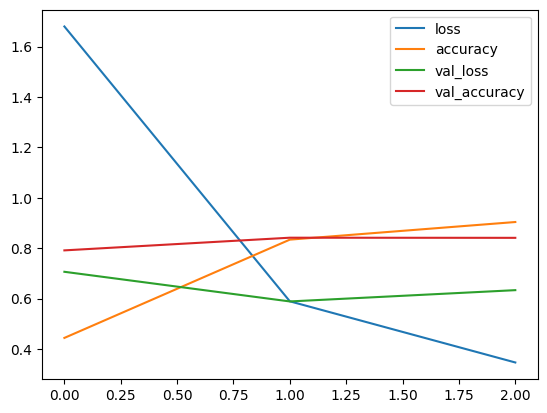

In [35]:
history = model.fit(
    X_train,
    train_lbl,
    batch_size=32,
    epochs=epochs,
    validation_data=(X_val, val_lbl)
)
pd.DataFrame(history.history).plot();

In [38]:
score = model.evaluate(X_test, test_lbl,
                       batch_size=128, verbose=1)

y_test_pred = model.predict(X_test).argmax(axis = 1)

print(f'accuracy: {np.round(score[1], 3)}')
print("F1 = {}".format(np.round(f1_score(test_lbl, y_test_pred, average='weighted'),3)))

59/59 [==============================] - 2s 37ms/step
accuracy: 0.827
F1 = 0.828


### Let's test our model on texts without labels

In [40]:
texts_wo_labels = [dic_test_wo_labels[i]['text'] for i in dic_test_wo_labels]

In [41]:
test_texts = k_tokenizer.texts_to_sequences(texts_wo_labels)
test_texts = keras.utils.pad_sequences(test_texts, maxlen=maxlen)

In [42]:
test_texts_pred_cat = model.predict(test_texts).argmax(axis = 1)

807/807 [==============================] - 31s 39ms/step


In [67]:
n = 20 # number of texts with predicted categories
l = 200 # text length

for lbl, t in zip(test_texts_pred_cat[:n], texts_wo_labels[:n]):
    print(le.inverse_transform([lbl])[0].upper(),
          ' - ',
          t[:l], 
          '\n')
      

TENNIS  -  Естественное восстановление после тяжелой тренировки занимает 72 часа. С криокамерой 24 часа. Быстрее в 3 раза из интервью крио физиотерапевта на ютуб канале Khamzat Chtokenoid Заход в криокамеру с те 

TENNIS  -  Тема нарядов продолжается Одна из британских журналисток захейтела образ Марии Саккари на Уимблдоне. Наряды действительно подчеркивают индивидуальность того кто их носит. Тот же наряд который выглядел 

ESPORT  -  Привет Избранный. Ты спрашиваешь себя ЧТО здесь происходит? Ответ скоро узнаешь. Ты получишь ряд подсказок каждая из которых дополняет общую картину. В конце самый внимательный заберет награду – одну  

TENNIS  -  КОРОЛЬ ПЯТИСОТНИКОВ В ДЕЛЕ Андрей Рублев успешно стартовал в Гамбурге в двух сетах обыграв Беранкиса 6 3 6 4. Далее чемпион 2020 года сыграет с Серундоло 

HOCKEY  -  19 июня ABL разыграет 100 000 рублей и чемпионские перстни всех дивизионов В этот день мы соберемся все вместе во дворце спорта Динамо на Лавочкина чтобы определить а затем и поздр